In [2]:
import tensorflow as tf
from PIL import Image
from io import BytesIO
import numpy as np
import os
import random
import math
from cv2 import imread
from skimage.transform import resize

In [3]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

# def read_imagefile(file) -> Image.Image:
#     image = Image.open(file)
#     return image

In [4]:
base_path = "D:\\Garage_Hackathon\\Dataset"
waste_categories = ["Food", "Metal", "Plastic", "Paper"] # 0,1,2,3

train_img = []
train_label = []
val_img = []
val_label = []

label = 0

for category in waste_categories:
    directory = base_path + "\\" + category
    lst = listdir_fullpath(directory)
    
    random.shuffle(lst)
    train_count = math.floor(len(lst)*0.75)
    
    train_l = [label]*train_count 
    train = lst[:train_count]
    train_img.extend(train)
    train_label.extend(train_l)
    
    val_l = [label]*(len(lst) - train_count)
    val = lst[train_count:]
    val_img.extend(val)
    val_label.extend(val_l)
    
    label+=1
    
print(len(val_img), len(val_label), len(train_img), len(train_label))

42 42 120 120


In [32]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def load_img_data(lst):
    lst_len = len(lst)
    data = np.empty((lst_len,224,224,3))
    for i in range(len(lst)):
        im = imread(lst[i])
        im = preprocess_input(im)
        im = resize(im, output_shape=(224, 224))
        data[i] = im
    return data

def load_mobilenetv2_model():
    model = tf.keras.applications.MobileNetV2(weights="imagenet")
    return model

def create_waste_model():
    model = load_mobilenetv2_model()
    waste_output = Dense(4, activation='softmax')
    waste_output = waste_output(model.layers[-2].output)
    waste_input = model.input
    waste_model = Model(inputs=waste_input, outputs=waste_output)
    for layer in waste_model.layers[:-4]:
        layer.trainable = False
    optimizer = tf.keras.optimizers.SGD()
    waste_model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = optimizer,
        metrics=['accuracy']
    )
    return waste_model

In [33]:
training_data = load_img_data(train_img)
training_label = np.array(train_label)
validation_data = load_img_data(val_img)
validation_label = np.array(val_label)

In [34]:
# %matplotlib inline
# import cv2
# from matplotlib import pyplot as plt
# n = 6
# img = training_data[n]
# print(training_label[n])
# plt.imshow(img)
# plt.show()

In [35]:
waste_model = create_waste_model()
waste_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [36]:
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [37]:
history = waste_model.fit(
    x=training_data,
    y=training_label,
    epochs=100,
    verbose=2,
    validation_data=(validation_data,validation_label),
    callbacks=[cp_callback]
)

Train on 120 samples, validate on 42 samples
Epoch 1/100

Epoch 00001: saving model to training_3/cp.ckpt
120/120 - 10s - loss: 1.3762 - acc: 0.4000 - val_loss: 1.4359 - val_acc: 0.4524
Epoch 2/100

Epoch 00002: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 1.0910 - acc: 0.5083 - val_loss: 1.3935 - val_acc: 0.4524
Epoch 3/100

Epoch 00003: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.9414 - acc: 0.6500 - val_loss: 1.3070 - val_acc: 0.4762
Epoch 4/100

Epoch 00004: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.8224 - acc: 0.7167 - val_loss: 1.1966 - val_acc: 0.5238
Epoch 5/100

Epoch 00005: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.7733 - acc: 0.7083 - val_loss: 1.0730 - val_acc: 0.5714
Epoch 6/100

Epoch 00006: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.6334 - acc: 0.8000 - val_loss: 1.1006 - val_acc: 0.5714
Epoch 7/100

Epoch 00007: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.5786 - acc: 0.8500 - val_loss:

Epoch 59/100

Epoch 00059: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0798 - acc: 1.0000 - val_loss: 0.6618 - val_acc: 0.7143
Epoch 60/100

Epoch 00060: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0951 - acc: 1.0000 - val_loss: 0.6989 - val_acc: 0.7143
Epoch 61/100

Epoch 00061: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0880 - acc: 1.0000 - val_loss: 0.6856 - val_acc: 0.7143
Epoch 62/100

Epoch 00062: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0836 - acc: 1.0000 - val_loss: 0.6754 - val_acc: 0.7143
Epoch 63/100

Epoch 00063: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0934 - acc: 1.0000 - val_loss: 0.6575 - val_acc: 0.7143
Epoch 64/100

Epoch 00064: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0854 - acc: 1.0000 - val_loss: 0.6871 - val_acc: 0.7143
Epoch 65/100

Epoch 00065: saving model to training_3/cp.ckpt
120/120 - 7s - loss: 0.0878 - acc: 1.0000 - val_loss: 0.6864 - val_acc: 0.7143
Epoch 66/100


In [27]:
waste_model.save('saved_model/waste_model_3.h5')

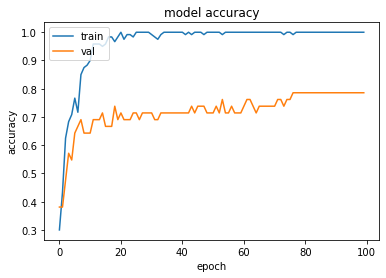

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
im = imread("D:\\Garage_Hackathon\Dataset\\Plastic\\trash112.jpg")
im = preprocess_input(im)
im = resize(im, output_shape=(224, 224))
im = np.expand_dims(im, 0)
preds = waste_model.predict(im)
preds.shape

(1, 4)

In [40]:
np.argmax(preds, axis=1)

array([2], dtype=int64)

In [27]:
validation_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])